**Part 1: Introduction to Data Types and Storage Methods**

Load the Titanic dataset and explore different types of data.

In [49]:
# Import required libraries
import pandas as pd

# Load Titanic dataset
df = pd.read_csv("titanic.csv")

# Show first few rows
df.head()

# Check the data types of each column
df.dtypes

pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

**Part 2: Compare and Contrast Types of Data Sources**

Write Python code to read data from different sources.

In [50]:
#Hands-On:
#Write Python code to read data from different sources.

# 1. CSV File (Titanic dataset - already loaded before)
df_csv = pd.read_csv("titanic.csv")
df_csv.head()

# 2. API Example: OpenWeatherMap (real-time weather for Southampton)

import requests

api_key = "0d1ad24782db5aaeeb1f380e8fad7bf8"
url = f"https://api.openweathermap.org/data/2.5/weather?q=Southampton&appid={api_key}&units=metric"

response = requests.get(url)
data_api = response.json()

# Print the extracted values
print({
    "Temperature (°C)": data_api["main"]["temp"],
    "Humidity (%)": data_api["main"]["humidity"]
})

# 3. SQLite Database Example (create and read a simple table)

import sqlite3

# Create a temporary in-memory database
conn = sqlite3.connect(":memory:")
cursor = conn.cursor()

# Create a simple student table
cursor.execute("CREATE TABLE students (id INTEGER, name TEXT)")
cursor.execute("INSERT INTO students VALUES (1, 'Alice'), (2, 'Bob')")

# Read from the database
df_db = pd.read_sql("SELECT * FROM students", conn)
df_db



{'Temperature (°C)': 13.3, 'Humidity (%)': 79}


,id,name
0,1,Alice
1,2,Bob


**Part 3: Structured vs. Unstructured Data**

Create examples of structured and unstructured data using the Titanic dataset.


In [51]:
print(df.head())
# I am saving structured Titanic data
df.to_csv("structured_data.csv", index=False)

   pclass  survived                                             name     sex  \
0     1.0       1.0                    Allen, Miss. Elisabeth Walton  female   
1     1.0       1.0                   Allison, Master. Hudson Trevor    male   
2     1.0       0.0                     Allison, Miss. Helen Loraine  female   
3     1.0       0.0             Allison, Mr. Hudson Joshua Creighton    male   
4     1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000    0.0    0.0   24160  211.3375       B5        S    2    NaN   
1   0.9167    1.0    2.0  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

This is structured data — we can see how every column has a label (like Age, Sex, Fare) and each row is one passenger.

Now I will extract some unstructured data — for example, passenger names and cabin notes.


In [52]:
# Show just the Name and Cabin columns
df[["name", "cabin"]].head(10)
# I am saving only the 'Name' column (unstructured text)
df['name'].to_csv("unstructured_data.txt", index=False, header=False)

Observations:

- The full dataset is structured, but it contains unstructured elements.
- The 'name' and 'cabin' columns are harder to standardize or analyze directly — they contain inconsistent formats and missing values.
- This shows how real-world datasets often include both structured and unstructured data together.

Understanding this difference helps us decide how to clean or process each part of our dataset effectively.


**Part 4: Storage Considerations**


Implement storage solutions in Python.


In [12]:
# Save Titanic data as CSV
df.to_csv("titanic_storage.csv", index=False)

# Read back the file
df_csv_storage = pd.read_csv("titanic_storage.csv")
df_csv_storage.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [13]:
import sqlite3

# Connect to SQLite database (file-based this time)
conn = sqlite3.connect("titanic_storage.db")

# Save DataFrame to a table
df.to_sql("passengers", conn, if_exists="replace", index=False)

# Read the data back
df_sql_storage = pd.read_sql("SELECT * FROM passengers LIMIT 5", conn)
df_sql_storage

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


Observations:

- CSV is simple and human-readable, but not efficient for large datasets.
- SQLite is faster for querying and handles structured data better.
- In real projects, we may use cloud databases or data lakes for even larger scale and speed.

Choosing the right storage depends on our data size, access needs, and budget.

**Part 5: Integrate and Use an API**

Fetch weather data for the departure (Southampton) and arrival (New York) locations of the Titanic.

In [14]:
import requests

api_key = "0d1ad24782db5aaeeb1f380e8fad7bf8"  # your existing API key

cities = ["Southampton", "New York"]
weather_data = []

for city in cities:
    url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        weather_data.append({
            "City": city,
            "Temperature (°C)": data["main"]["temp"],
            "Humidity (%)": data["main"]["humidity"]
        })
    else:
        print(f"Failed to fetch data for {city}. Error: {response.status_code}")

# Convert to DataFrame
import pandas as pd
weather_df = pd.DataFrame(weather_data)
weather_df


,City,Temperature (°C),Humidity (%)
0,Southampton,13.41,75
1,New York,27.91,62


**Part 6: Data Quality Dimensions**

Assess the quality of the Titanic dataset.

In [18]:
# Check if any duplicate rows exist
df.duplicated().sum()
# Check unique values in 'Sex' column (should only be 'male' or 'female')
df['sex'].unique()
# Check if Age column has any unrealistic values
df['age'].describe()


array(['female', 'male', nan], dtype=object)

Observations:

- Completeness: Some columns like Cabin and Age may have missing values.
- Duplicates: If duplicates exist, they should be removed before analysis.
- Consistency: Values like male, female look consistent. This is a good sign.
- Accuracy: Hard to measure without an external source, but we can flag strange values (e.g., negative age, extremely high fare).

Checking data quality helps prevent wrong conclusions during analysis or modeling.


**Part 7: Data Modeling**

Create a simple data model for a Hotel Management System.

In [27]:
import pandas as pd

#Create the Guests Table
guests = pd.DataFrame({
    "Guest_ID": [1, 2],
    "Name": ["Alice", "Bob"],
    "Email": ["alice@example.com", "bob@example.com"]
})
print(f"Guests Table\n: {guests}\n")

#Create the Rooms Table
rooms = pd.DataFrame({
    "Room_ID": [101, 102],
    "Room_Type": ["Single", "Double"],
    "Price": [100, 150]
})
print(f"Rooms Table\n: {rooms}\n")

#Create the Bookings Table
bookings = pd.DataFrame({
    "Booking_ID": [1, 2],
    "Guest_ID": [1, 2],     # Foreign key to Guests
    "Room_ID": [101, 102],  # Foreign key to Rooms
    "Nights": [3, 2]
})
print(f"Bookings Table\n: {bookings}\n")

Guests Table
:    Guest_ID   Name              Email
0         1  Alice  alice@example.com
1         2    Bob    bob@example.com

Rooms Table
:    Room_ID Room_Type  Price
0      101    Single    100
1      102    Double    150

Bookings Table
:    Booking_ID  Guest_ID  Room_ID  Nights
0           1         1      101       3
1           2         2      102       2



Observations:

- Each table is an entity.
- 'Guest_ID' and 'Room_ID' act as foreign keys in the Bookings table.
- This basic structure allows us to answer real questions like:
  - Who booked which room?
  - How much did a guest pay?

This is a simple relational data model, just like in real database design.


**Part 8: Data Visualization**

Create visualizations using matplotlib and seaborn.

C:\Users\achar\AppData\Local\Temp\ipykernel_18140\3947065357.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="pclass", palette="Blues")


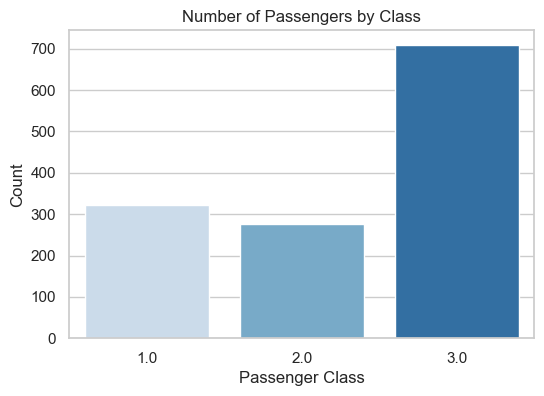

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

#Bar Chart — Passengers by Class

# Set plot style
sns.set(style="whitegrid")

# Countplot for passenger class
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="pclass", palette="Blues")

plt.title("Number of Passengers by Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.savefig("barchart.png")
plt.show()


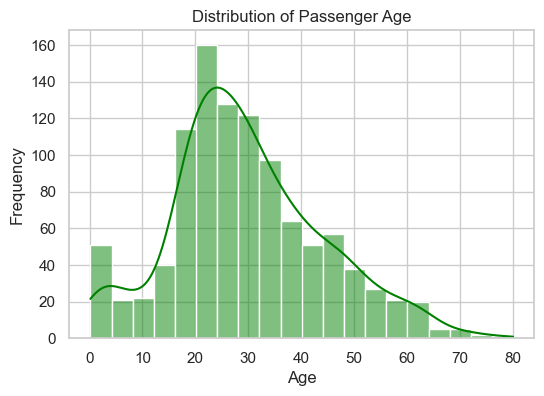

In [35]:
#Histogram- Age Distribution
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x="age", bins=20, kde=True, color="green")

plt.title("Distribution of Passenger Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.savefig('histogram.png')
plt.show()


Observations:

- Most passengers were in 3rd class, fewer in 1st and 2nd.
- The age distribution shows many passengers between 20–40 years, with fewer children and elderly.

Visualizations make data stories easier to tell — and help analysts present insights effectively.


**Part 9: Web Scraping**

Scrape additional data related to the Titanic from a website.

I'll extract:
- The first paragraph from the page


In [38]:
import requests
from bs4 import BeautifulSoup

# Wikipedia Titanic page
url = "https://en.wikipedia.org/wiki/RMS_Titanic"
response = requests.get(url)

# Parse HTML
soup = BeautifulSoup(response.content, "html.parser")

# First clean paragraph with spacing preserved
paragraphs = soup.find_all('p')

for p in paragraphs:
    text = p.get_text(separator=" ", strip=True)
    if text:
        print("First Paragraph:\n")
        print(text)
        break



First Paragraph:

RMS Titanic was a British ocean liner that sank in the early hours of 15 April 1912 as a result of striking an iceberg on her maiden voyage from Southampton , England, to New York City , United States. Of the estimated 2,224 passengers and crew aboard, approximately 1,500 died (estimates vary), making the incident one of the deadliest peacetime sinkings of a single ship . [ 4 ] Titanic , operated by White Star Line, carried some of the wealthiest people in the world, as well as hundreds of emigrants from the British Isles , Scandinavia , and elsewhere in Europe who were seeking a new life in the United States and Canada. The disaster drew public attention, spurred major changes in maritime safety regulations, and inspired a lasting legacy in popular culture . It was the second time White Star Line had lost a ship on her maiden voyage, the first being RMS Tayleur in 1854.
